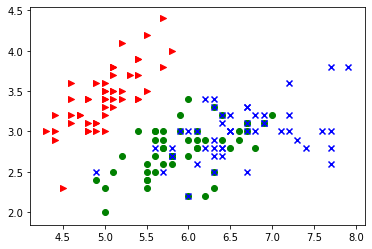

In [3]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import numpy as np


data = load_iris()

features = data.data
feature_names = data.feature_names
target = data.target
target_names = data.target_names

labels = target_names[target]

for t, marker, c in zip(range(3),">ox","rgb"):    
# We plot each class on its own to get different colored markers    
    plt.scatter(features[target == t,0],features[target == t,1],marker=marker,c=c)

In [2]:
plength = features[:, 2]
print(plength)

is_setosa = (labels == 'setosa')

max_setosa = len(plength[is_setosa])
min_non_setosa = len(plength[~is_setosa])

print('Maximum of setosa: {0}.'.format(max_setosa))

print('Minimum of others: {0}.'.format(min_non_setosa))

[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
 4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
 4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3
 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.
 4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9
 5.7 5.2 5.  5.2 5.4 5.1]
Maximum of setosa: 50.
Minimum of others: 100.


In [4]:
for petal in plength:
    if petal < 2: 
        print('Iris Setosa')
    else: 
        print('Iris Virginica or Iris Versicolour')

Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Virginica or Iris Versicolour
Iris Virginica or Iris Versicolour
Iris Virginica or Iris Versicolour
Iris Virginica or Iris Versicolour
Iris Virginica or Iris Versicolour
Iris Virginica or Iris Versicolour
Iris Virginica or Iris Versicolour
Iris Virginica or Iris Versicolour
Iris Virginica or Iris Versicolour
Iris Virginica or Iris Versicolour
Iris Virginica or Iris Versicolour
Iris Virginica 

In [5]:
features = features[labels != "setosa"]
labels = labels[labels != "setosa"]
virginica = (labels == 'virginica')

best_acc = -1.0

for fi in range(features.shape[1]): 
    thresh = features[:,fi].copy()  
    thresh.sort()  
 
    for t in thresh:    
        pred = (features[:,fi] > t)    
        acc = (pred == virginica).mean()    
        
        if acc > best_acc:      
            best_acc = acc      
            best_fi = fi     
            best_t = t

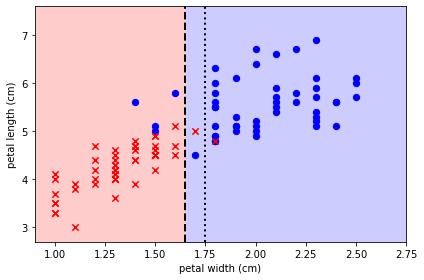

In [7]:
t = 1.65
t2 = 1.75

f0, f1 = 3, 2

area1c = (1., .8, .8)
area2c = (.8, .8, 1.)
    
x0 = features[:, f0].min() * .9
x1 = features[:, f0].max() * 1.1

y0 = features[:, f1].min() * .9
y1 = features[:, f1].max() * 1.1

fig,ax = plt.subplots()
ax.fill_between([t, x1], [y0, y0], [y1, y1], color=area2c)
ax.fill_between([x0, t], [y0, y0], [y1, y1], color=area1c)
ax.plot([t, t], [y0, y1], 'k--', lw=2)
ax.plot([t2, t2], [y0, y1], 'k:', lw=2)
ax.scatter(features[virginica, f0],
            features[virginica, f1], c='b', marker='o', s=40)
ax.scatter(features[~virginica, f0],
            features[~virginica, f1], c='r', marker='x', s=40)
ax.set_ylim(y0, y1)
ax.set_xlim(x0, x1)
ax.set_xlabel(feature_names[f0])
ax.set_ylabel(feature_names[f1])
fig.tight_layout()

In [8]:
# Building More Complex Classifiers
def distance(p0, p1):  
    return np.sum((p0-p1)**2)

def nn_classify(training_set, training_labels, new_example):  
    dists = np.array([distance(t, new_example) for t in training_set])
    nearest = dists.argmin()  

    return training_labels[nearest]

In [9]:
# subtract the mean for each feature:
features -= features.mean(axis=0)

# divide each feature by its standard deviation
features /= features.std(axis=0)

In [10]:
#Code below is taken from github repo of the book

import numpy as np

# This function was called ``learn_model`` in the first edition
def fit_model(k, features, labels):
    '''Learn a k-nn model'''
    # There is no model in k-nn, just a copy of the inputs
    return k, features.copy(), labels.copy()


def plurality(xs):
    '''Find the most common element in a collection'''
    from collections import defaultdict
    counts = defaultdict(int)
    for x in xs:
        counts[x] += 1
    maxv = max(counts.values())
    for k, v in counts.items():
        if v == maxv:
            return k

# This function was called ``apply_model`` in the first edition
def predict(model, features):
    '''Apply k-nn model'''
    k, train_feats, labels = model
    results = []
    for f in features:
        label_dist = []
        # Compute all distances:
        for t, ell in zip(train_feats, labels):
            label_dist.append((np.linalg.norm(f - t), ell))
        label_dist.sort(key=lambda d_ell: d_ell[0])
        label_dist = label_dist[:k]
        results.append(plurality([ell for _, ell in label_dist]))
    return np.array(results)


def accuracy(features, labels, model):
    preds = predict(model, features)
    return np.mean(preds == labels)


In [11]:
def fit_model(features, labels):
    '''Learn a simple threshold model'''
    best_acc = -1.0
    # Loop over all the features:
    for fi in range(features.shape[1]):
        thresh = features[:, fi].copy()
        # test all feature values in order:
        thresh.sort()
        for t in thresh:
            pred = (features[:, fi] > t)

            # Measure the accuracy of this 
            acc = (pred == labels).mean()

            rev_acc = (pred == ~labels).mean()
            if rev_acc > acc:
                acc = rev_acc
                reverse = True
            else:
                reverse = False
            if acc > best_acc:
                best_acc = acc
                best_fi = fi
                best_t = t
                best_reverse = reverse

    # A model is a threshold and an index
    return best_t, best_fi, best_reverse


# This function was called ``apply_model`` in the first edition
def predict(model, features):
    '''Apply a learned model'''
    # A model is a pair as returned by fit_model
    t, fi, reverse = model
    if reverse:
        return features[:, fi] <= t
    else:
        return features[:, fi] > t

def accuracy(features, labels, model):
    '''Compute the accuracy of the model'''
    preds = predict(model, features)
    return np.mean(preds == labels)


In [14]:
from sklearn.datasets import load_iris
# from threshold import fit_model, accuracy

data = load_iris()
features = data['data']
labels = data['target_names'][data['target']]

# We are going to remove the setosa examples as they are too easy:
is_setosa = (labels == 'setosa')
features = features[~is_setosa]
labels = labels[~is_setosa]

# Now we classify virginica vs non-virginica
is_virginica = (labels == 'virginica')

# Split the data in two: testing and training
testing = np.tile([True, False], 50) # testing = [True,False,True,False,True,False...]

# Training is the negation of testing: i.e., datapoints not used for testing,
# will be used for training
training = ~testing

model = fit_model(features[training], is_virginica[training])
train_accuracy = accuracy(features[training], is_virginica[training], model)
test_accuracy = accuracy(features[testing], is_virginica[testing], model)

print('''\
Training accuracy was {0:.1%}.
Testing accuracy was {1:.1%} (N = {2}).
'''.format(train_accuracy, test_accuracy, testing.sum()))

Training accuracy was 96.0%.
Testing accuracy was 90.0% (N = 50).

